### Libraries

In [ ]:
# --------------------------------------------------------------
# System utilities
# --------------------------------------------------------------
import os  # Provides functions to interact with the operating system (file management, environment variables, etc.)

# --------------------------------------------------------------
# Data manipulation libraries
# --------------------------------------------------------------
import pandas as pd  # Data manipulation and analysis, providing DataFrame and Series data structures
import numpy as np   # Supports large, multi-dimensional arrays and matrices, essential for scientific computing

# --------------------------------------------------------------
# Data visualization libraries
# --------------------------------------------------------------
import matplotlib.pyplot as plt  # 2D plotting library for creating various types of visualizations (line, scatter, etc.)
import seaborn as sns            # Statistical data visualization built on top of Matplotlib, ideal for creating plots like heatmaps, pairplots, etc.

# --------------------------------------------------------------
# Machine learning models and preprocessing from scikit-learn
# --------------------------------------------------------------
from sklearn.preprocessing import StandardScaler  # StandardScaler standardizes features by removing the mean and scaling to unit variance
from sklearn.feature_selection import VarianceThreshold  # Feature selection based on variance threshold, removes features with low variance
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction, finding principal components
from sklearn.cluster import DBSCAN  # DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is used for density-based clustering
from sklearn.cluster import KMeans  # K-Means clustering algorithm used for partitioning data into K clusters
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier for supervised learning tasks like classification
from sklearn.metrics import silhouette_score  # Calculates silhouette score to evaluate the quality of clusters

# --------------------------------------------------------------
# Hierarchical Clustering from SciPy
# --------------------------------------------------------------
from scipy.cluster.hierarchy import fcluster  # Extracts clusters from the hierarchical clustering tree (dendrogram)
from scipy.cluster.hierarchy import dendrogram  # Plots dendrograms, visualizing the hierarchical clustering process
from scipy.cluster.hierarchy import linkage  # Performs hierarchical/agglomerative clustering, generating a linkage matrix

# --------------------------------------------------------------
# Neighbors and distance-based techniques
# --------------------------------------------------------------
from sklearn.neighbors import NearestNeighbors  # Finds the nearest neighbors in the dataset for clustering and anomaly detection

# --------------------------------------------------------------
# Numerical operations
# --------------------------------------------------------------
import numpy as np  # Supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions



### Upload Dataset

In [22]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..', 'data', '03_primary','3.spotify.csv')

# Load the CSV file

spotify = pd.read_csv(ruta_csv_relativa)
spotify.head(5)

,duration_ms_scaled,popularity_scaled,speechiness_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,loudness_scaled,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,track_genre,track_genre_encoded,intensity,popularity_class
0,0.461947,0.920689,0.494433,0.751530,0.050533,0.780650,0.506999,0.669059,0.460989,0.718593,0.301970,acoustic,0,0.311636,1
1,0.387347,0.849624,0.328098,0.994567,0.136151,0.510439,0.344792,0.394881,0.165983,0.268342,0.243282,acoustic,0,0.069720,1
2,0.446450,0.858572,0.244770,0.887294,0.000000,0.541840,0.441037,0.414159,0.358987,0.120603,0.236770,acoustic,0,0.157242,1
3,0.439024,0.913703,0.131397,0.993063,0.309253,0.567599,0.336466,0.229945,0.059581,0.143719,0.830006,acoustic,0,0.015854,1
4,0.436375,0.949954,0.229607,0.945470,0.000000,0.468269,0.442250,0.606940,0.442989,0.167839,0.482246,acoustic,0,0.273774,1


### Standar_Scaled

Normalisation of the data is essential to prevent some features from dominating the model, allowing for a more balanced and accurate analysis.

In [23]:
# Select features to standardize
features = ['duration_ms_scaled', 'popularity_scaled', 'speechiness_scaled', 'acousticness_scaled',
            'instrumentalness_scaled', 'liveness_scaled', 'loudness_scaled',
            'danceability_scaled', 'energy_scaled', 'valence_scaled', 'tempo_scaled']

# Scale the features
scaler = StandardScaler()
X_normalized = spotify[features]
X_scaled = scaler.fit_transform(X_normalized)
spotify[features] = X_scaled  # Overwrite the original columns with the scaled values

# Check the first few rows of the DataFrame
spotify.head(5)


,duration_ms_scaled,popularity_scaled,speechiness_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,loudness_scaled,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,track_genre,track_genre_encoded,intensity,popularity_class
0,0.220383,1.175748,1.215603,-0.247385,-0.874528,1.118338,0.074817,0.628742,-0.722218,0.928477,-1.161034,acoustic,0,0.311636,1
1,-0.919183,0.769006,0.326866,0.943214,-0.652616,-0.643117,-1.610460,-0.856596,-1.898577,-0.802499,-1.513321,acoustic,0,0.069720,1
2,-0.016348,0.820217,-0.118358,0.417702,-1.005503,-0.438419,-0.610505,-0.752159,-1.128959,-1.370475,-1.552408,acoustic,0,0.157242,1
3,-0.129787,1.135763,-0.724115,0.935844,-0.203954,-0.270505,-1.696960,-1.750120,-2.322864,-1.281608,2.008565,acoustic,0,0.015854,1
4,-0.170243,1.343246,-0.199375,0.702694,-1.005503,-0.918015,-0.597901,0.292220,-0.793996,-1.188877,-0.078905,acoustic,0,0.273774,1


## Predictors

### CORR

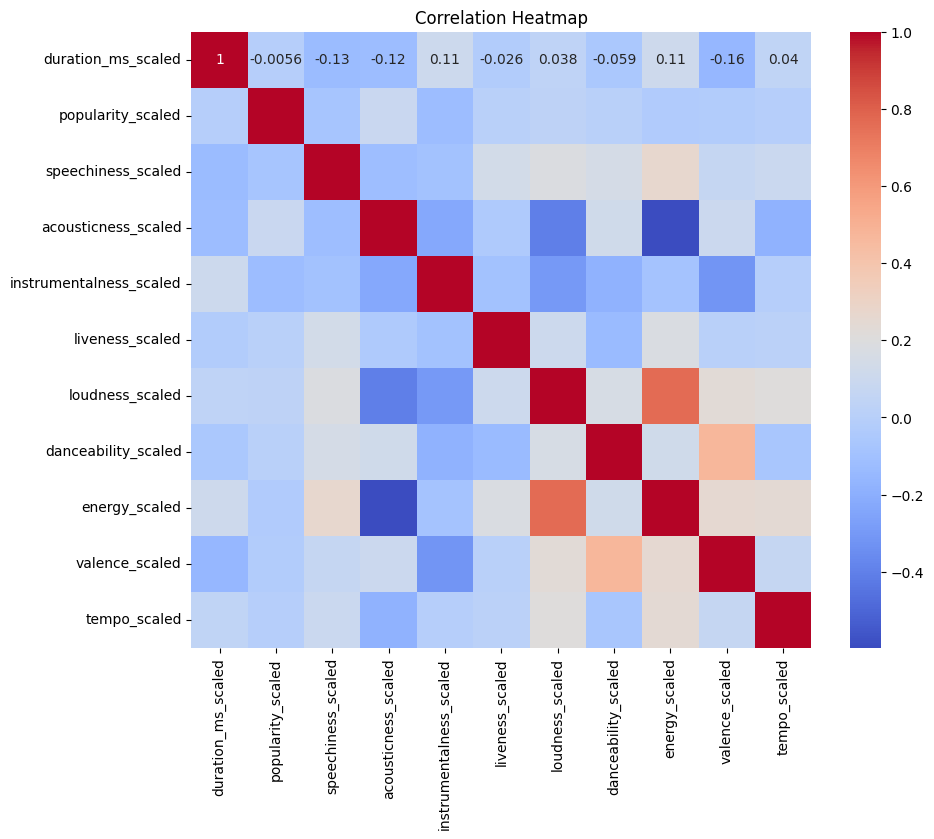

In [24]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(spotify[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Filter features with low variance

In [25]:
# Filter features with low variance
selector = VarianceThreshold(threshold=0.01)  # Adjust the threshold if necessary
X_reduced = selector.fit_transform(X_scaled)

# Update the names of the selected features
selected_features = [features[i] for i in range(len(features)) if selector.get_support()[i]]
print("Selected features:", selected_features)


Selected features: ['duration_ms_scaled', 'popularity_scaled', 'speechiness_scaled', 'acousticness_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'loudness_scaled', 'danceability_scaled', 'energy_scaled', 'valence_scaled', 'tempo_scaled']


### Select important features

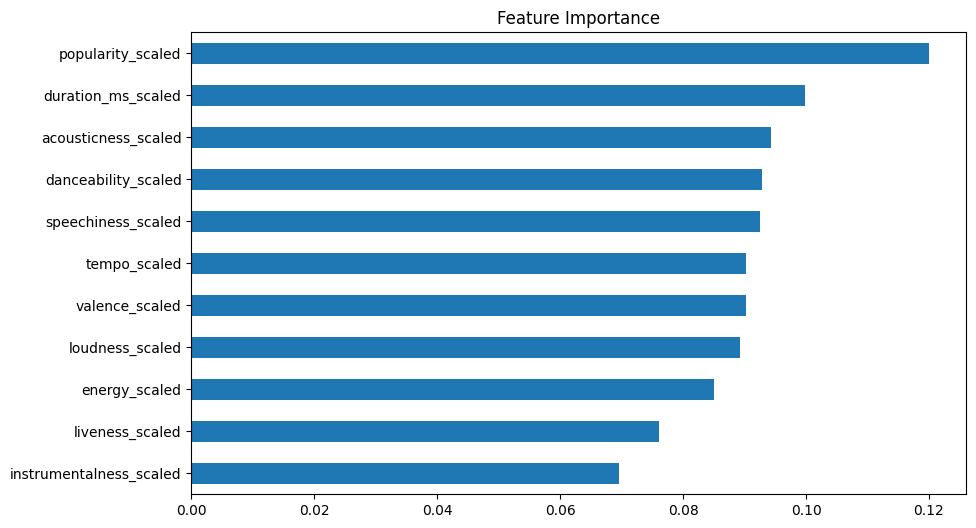

In [26]:
# Ensure that `track_genre_encoded` is defined and encoded as numeric
if 'track_genre_encoded' not in spotify.columns:
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    spotify['track_genre_encoded'] = encoder.fit_transform(spotify['track_genre'])

# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_reduced, spotify['track_genre_encoded'])

# Display the importance of selected features
importances = pd.Series(rf.feature_importances_, index=selected_features)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

### Top Features

In [27]:
top_features = ['popularity_scaled', 'duration_ms_scaled', 'acousticness_scaled', 
                'danceability_scaled', 'speechiness_scaled']
X_top = spotify[top_features]
X_top.head(5)

,popularity_scaled,duration_ms_scaled,acousticness_scaled,danceability_scaled,speechiness_scaled
0,1.175748,0.220383,-0.247385,0.628742,1.215603
1,0.769006,-0.919183,0.943214,-0.856596,0.326866
2,0.820217,-0.016348,0.417702,-0.752159,-0.118358
3,1.135763,-0.129787,0.935844,-1.750120,-0.724115
4,1.343246,-0.170243,0.702694,0.292220,-0.199375


# k-means

### Elbow Method and Silhouette Score

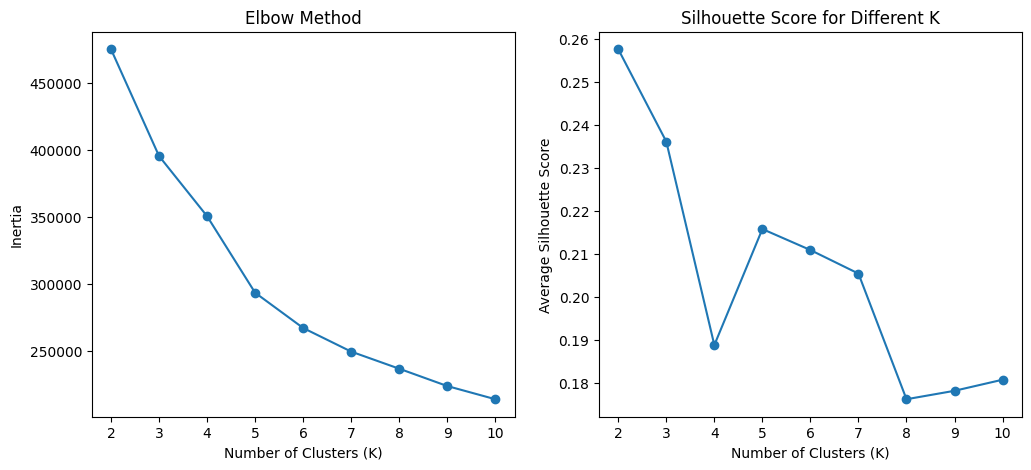

In [28]:
# Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Range of K values to test
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_top)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_top, kmeans.labels_))

# Elbow Method Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()


### Application of K-means and Centroids

In [43]:
# Use the optimal value of K
k_optimal = 3  # Adjust based on the analysis
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
spotify['kmeans_cluster'] = kmeans.fit_predict(X_top)

# Cluster centroids
print("Cluster centroids:")
print(kmeans.cluster_centers_)

Cluster centroids:
[[-0.3058655   0.35486512 -1.59817105 -0.46770571  0.10837631]
 [-0.23007772 -0.3958348   0.26781364  0.7642174   1.22972959]
 [ 0.21122735  0.03942876  0.47268652 -0.15606579 -0.56771179]]


## Cluster visualisation with PCA

### PCA Before

C:\Users\Juako\AppData\Local\Temp\ipykernel_25200\3353530045.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], alpha=0.7, s=50, cmap='viridis')


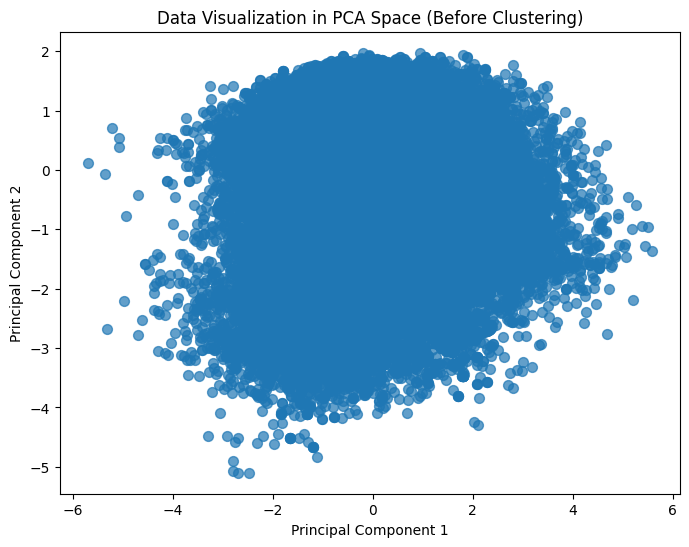

In [44]:
# Reduce to 2 dimensions with PCA
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X_top)

# Visualize the data without cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], alpha=0.7, s=50, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Visualization in PCA Space (Before Clustering)")
plt.show()

### PCA After

C:\Users\Juako\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Juako\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


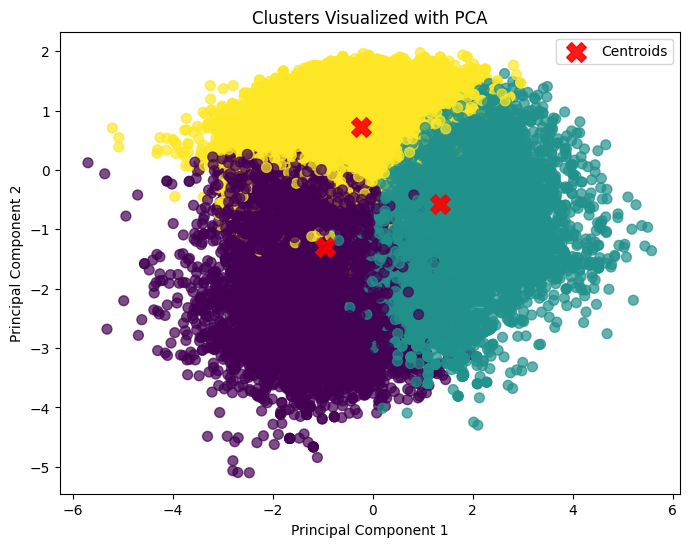

In [45]:
# Reduce to 2 dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_top)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spotify['kmeans_cluster'], cmap='viridis', alpha=0.7, s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            c='red', marker='X', s=200, alpha=0.9, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters Visualized with PCA")
plt.legend()
plt.show()

## Evaluation of Clustering with Silhouette Score

In [46]:
silhouette_avg = silhouette_score(X_top, spotify['kmeans_cluster'])
print(f"Average Silhouette Score for K={k_optimal}: {silhouette_avg:.3f}")

Average Silhouette Score for K=3: 0.236


## Interpretation

### Summary Characteristics

In [47]:
# Calculate averages by cluster
cluster_summary = spotify.groupby('kmeans_cluster')[top_features].mean()

print("Summary of average features by cluster:")
cluster_summary

Summary of average features by cluster:


,popularity_scaled,duration_ms_scaled,acousticness_scaled,danceability_scaled,speechiness_scaled
kmeans_cluster,,,,,
0,-0.306629,0.355561,-1.597344,-0.467768,0.107415
1,-0.230381,-0.395383,0.267730,0.763918,1.236205
2,0.210820,0.038058,0.472299,-0.154014,-0.566590


### Heatmap 

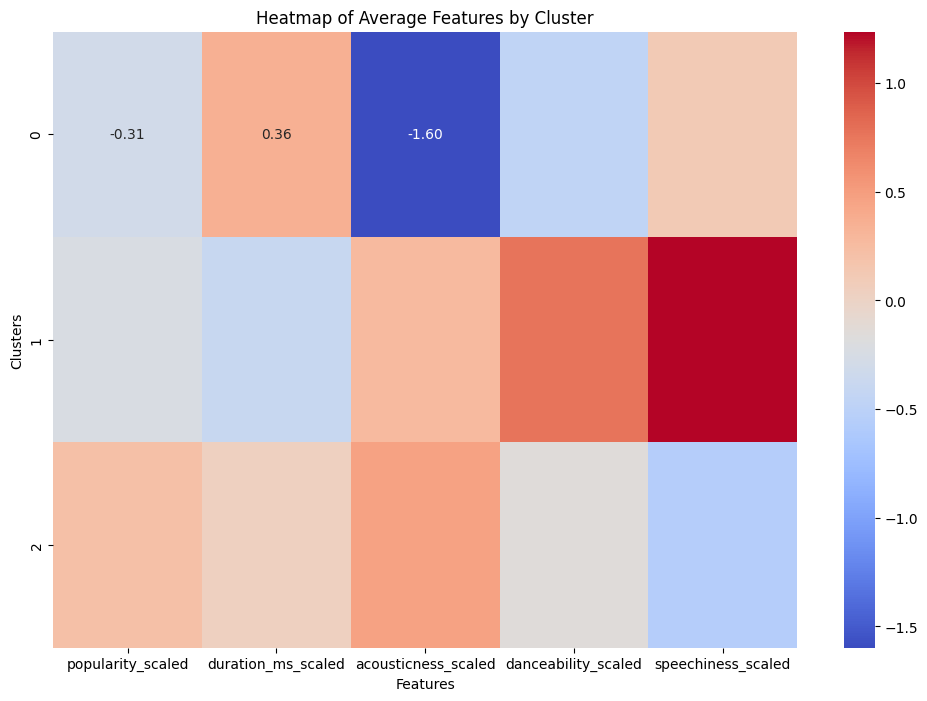

In [48]:
# Plot a heatmap for the average features
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Average Features by Cluster")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

## Result

---

### **K-Means Analysis**

Below is the interpretation of the clusters generated by the **K-Means** model, using the selected features.

---

### **Summary of Average Features by Cluster**

| Cluster | Popularity (`popularity_scaled`) | Duration (`duration_ms_scaled`) | Acousticness (`acousticness_scaled`) | Danceability (`danceability_scaled`) | Speech Content (`speechiness_scaled`) |
|---------|-----------------------------------|----------------------------------|--------------------------------------|--------------------------------------|----------------------------------------|
| **0**   | -0.306629                        |  0.355561                       | -1.597344                           | -0.467768                            |  0.107415                             |
| **1**   | -0.230381                        | -0.395383                       |  0.267730                           |  0.763918                            |  1.236205                             |
| **2**   |  0.210820                        |  0.038058                       |  0.472299                           | -0.154014                            | -0.566590                             |

---

### **Interpretation by Cluster**

#### **Cluster 0**
- Songs with **low popularity** (`popularity_scaled` = -0.306629).
- **Long duration** (`duration_ms_scaled` = 0.355561).
- Very **low acousticness** (`acousticness_scaled` = -1.597344).
- **Moderately danceable** (`danceability_scaled` = -0.467768).
- **Balanced speech content** (`speechiness_scaled` = 0.107415).

#### **Cluster 1**
- Songs with **moderate-low popularity** (`popularity_scaled` = -0.230381).
- **Short duration** (`duration_ms_scaled` = -0.395383).
- Slight inclination towards being **acoustic** (`acousticness_scaled` = 0.267730).
- **Highly danceable** (`danceability_scaled` = 0.763918).
- Songs with **high speech content** (`speechiness_scaled` = 1.236205).

#### **Cluster 2**
- Songs with **higher popularity** (`popularity_scaled` = 0.210820).
- **Average duration** (`duration_ms_scaled` = 0.038058).
- Slight inclination towards being **acoustic** (`acousticness_scaled` = 0.472299).
- **Less danceable** (`danceability_scaled` = -0.154014).
- Songs with **low speech content** (`speechiness_scaled` = -0.566590).

---

### **Conclusion**
Three clusters were produced by the K-Means model, and these can be explained as follows:
1. **Cluster 0**: Long and less popular songs, with low acousticness and moderate danceability.
2. **Cluster 1**: Short, highly danceable songs with high speech content.
3. **Cluster 2**: More popular songs with balanced characteristics, lower danceability, and low speech content.

# DBSCAN

### Elbow

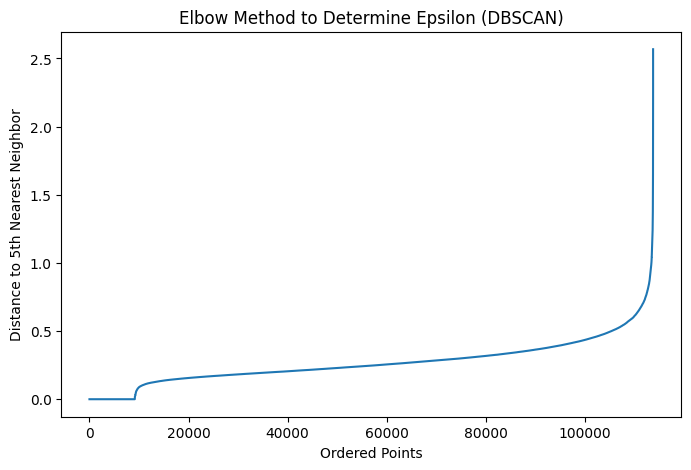

In [35]:
# Compute k-nearest neighbor distances
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_top)
distances, indices = neighbors_fit.kneighbors(X_top)

# Sort the distances
distances = np.sort(distances[:, -1])  # Distances to the fifth nearest neighbor
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('Elbow Method to Determine Epsilon (DBSCAN)')
plt.xlabel('Ordered Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()


### Epsilon

In [36]:
# Set the epsilon parameter based on the elbow plot
epsilon = 0.5  # Adjust between 0.5 and 0.6 based on the results
min_samples = 5  # Keep the initial value or adjust based on the expected density

# Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
spotify['dbscan_cluster'] = dbscan.fit_predict(X_top)

# Check the generated clusters
print("Unique clusters generated by DBSCAN:")
print(np.unique(spotify['dbscan_cluster']))


Unique clusters generated by DBSCAN:
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171]


### Evaluate Clustergin

In [37]:
print(spotify['dbscan_cluster'].value_counts())

dbscan_cluster
 0      105847
-1        5132
 1        1530
 38         61
 92         39
         ...  
 126         4
 170         4
 102         3
 151         3
 163         3
Name: count, Length: 173, dtype: int64


In [38]:
non_noise_mask = spotify['dbscan_cluster'] != -1
if non_noise_mask.sum() > 0:
    silhouette_avg = silhouette_score(X_scaled[non_noise_mask], spotify['dbscan_cluster'][non_noise_mask])
    print(f"Average Silhouette Score for DBSCAN: {silhouette_avg:.3f}")
else:
    print("Not enough points not marked as noise to calculate the Silhouette Score.")

Average Silhouette Score for DBSCAN: -0.257


## Cluster visualisation with PCA

### PCA Before

C:\Users\Juako\AppData\Local\Temp\ipykernel_25200\2651131783.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], cmap='viridis', alpha=0.7, s=50)


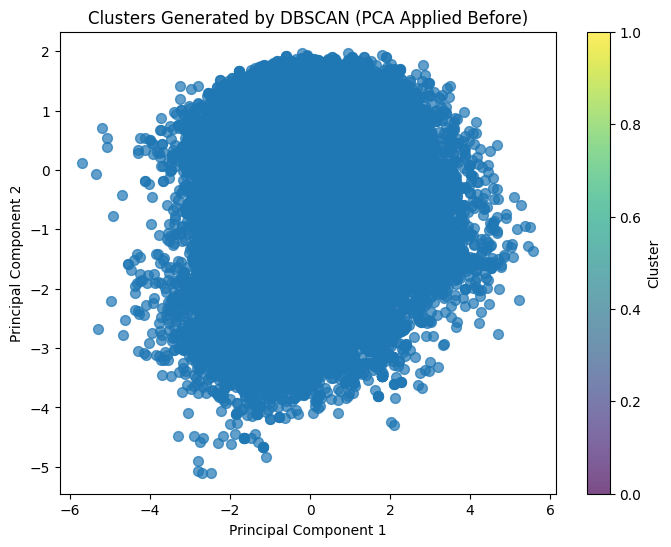

In [39]:
# Reduce to 2 dimensions with PCA before DBSCAN
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X_top)

# Plot clusters generated in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], cmap='viridis', alpha=0.7, s=50)
plt.title("Clusters Generated by DBSCAN (PCA Applied Before)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

### PCA After

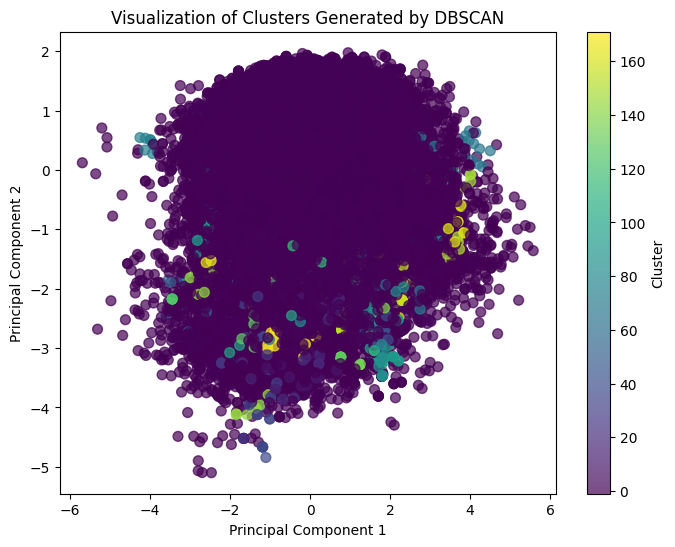

In [40]:
# Reduce to 2 dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_top)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spotify['dbscan_cluster'], cmap='viridis', alpha=0.7, s=50)
plt.title("Visualization of Clusters Generated by DBSCAN")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

## Interpretation

### Summary of features

In [41]:
# Summary of average features by cluster
cluster_summary = spotify[spotify['dbscan_cluster'] != -1].groupby('dbscan_cluster')[top_features].mean()
print("Summary of average features by cluster:")
cluster_summary


Summary of average features by cluster:


,popularity_scaled,duration_ms_scaled,acousticness_scaled,danceability_scaled,speechiness_scaled
dbscan_cluster,,,,,
0,0.135958,0.017176,0.042154,0.012137,-0.047736
1,-4.093858,-0.060171,0.179356,0.307616,-0.218148
2,0.630811,1.191752,0.567717,-1.892852,1.100129
3,-1.305986,-1.378595,-0.418912,1.737413,2.323432
4,-3.478818,0.183055,-1.324642,-1.437129,0.467476
...,...,...,...,...,...
167,0.175814,-0.222740,-1.077716,-2.921564,1.749099
168,0.115746,-2.071572,-3.461093,-2.693252,1.342522
169,0.112521,-0.409227,0.882109,-2.546749,1.498362


### Heatmap

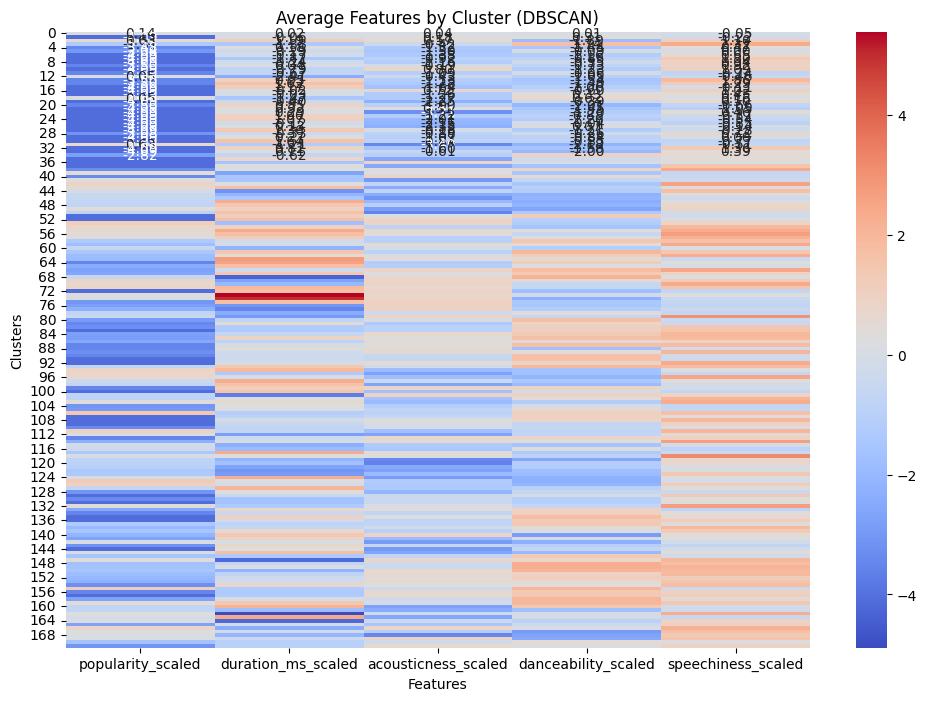

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Average Features by Cluster (DBSCAN)")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

## Result

**DBSCAN analysis**

The **DBSCAN** model generated a total of **171 clusters**, including a special group as `-1`, which represents points with noise (these are data that do not belong to any main cluster). This configuration and the results are discussed below.

---

**Model Summary

**Global Characteristics** **Clusters Identified
- Clusters Identified:** 171
- Noise:** ** Noise:** Noise:** Noise:** Noise:** Noise:** Noise:** 
  - Number of points with noise: 5,132 (4.51% of the total).
  - Cluster `-1` represents these points.
- Major Clusters:** **Main Clusters:**
  - The majority of the points were grouped in **Cluster 0** (105,847 points, more than 92% of the total).
  - The other clusters contain significantly smaller numbers of points.

---

DBSCAN Challenges with 171 Clusters** **DBSCAN Challenges with 171 Clusters**.

1. **Dominant Cluster:** 2.
   - More than 92% of the data is in **Cluster 0**, suggesting that DBSCAN failed to adequately separate the subgroups within this majority cluster.

2. **Small Clusters
   - Many clusters have a minimal number of points, making practical interpretation or extraction of useful insights difficult.

3. **Noise.
   - 4.51% of the points were classified as noise (`-1`), which may indicate outliers or regions with low densities.

4. **Complexity:**
   - Although DBSCAN is effective in detecting arbitrary structures in the data, the large number of clusters may make it difficult to use for practical or scalable purposes.

---

**Conclusion

The DBSCAN model did not meet initial expectations due to:
- An oversaturation in the majority cluster.
- Small clusters making generalisation and interpretative analysis difficult.

# Hierarchical Clustering

### Sample selection

In [10]:
# Select 20,000 random samples from X_top
sample_size = 20000
X_top_sample = X_top.sample(n=sample_size, random_state=42)  # random_state for reproducible results

# Check the dimensions of the sample
print(f"Sample dimensions: {X_top_sample.shape}")

Dimensiones de la muestra: (20000, 5)


In [22]:
# Create the linkage matrix using the Ward method
linkage_matrix = linkage(X_top_sample, method='ward')  # Change 'ward' to other methods if needed

### Dendogram

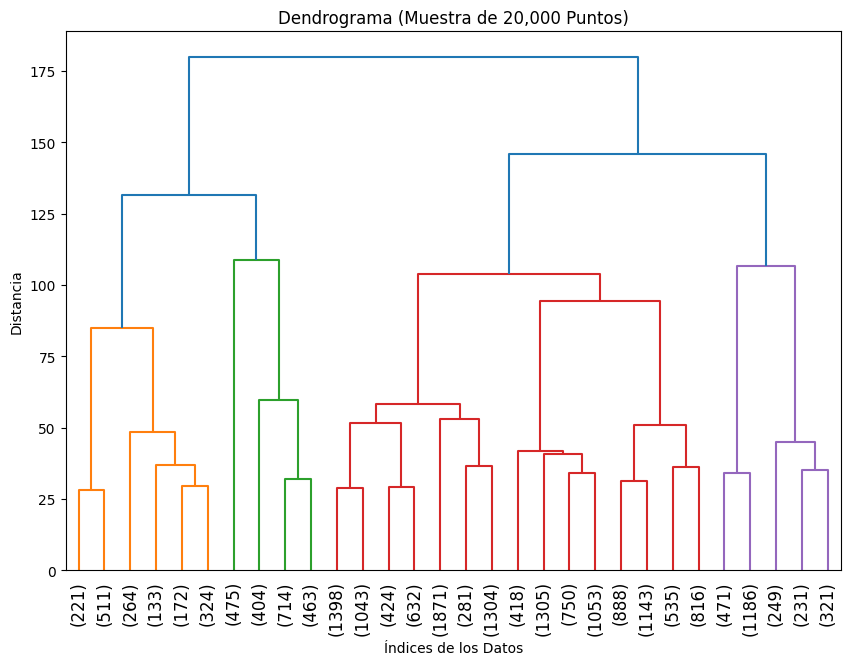

In [23]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title("Dendrogram (Sample of 20,000 Points)")
plt.xlabel("Data Indices")
plt.ylabel("Distance")
plt.show()

### Defining Clusters

In [30]:
# Cut the dendrogram into 4 clusters (adjust based on the dendrogram observation)
n_clusters = 4
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Add clusters to the sample DataFrame
X_top_sample['hierarchical_cluster'] = clusters

# View the distribution of clusters
print(X_top_sample['hierarchical_cluster'].value_counts())

hierarchical_cluster
3    13861
4     2458
2     2056
1     1625
Name: count, dtype: int64


## Cluster visualisation with PCA

### PCA Before

C:\Users\Juako\AppData\Local\Temp\ipykernel_6740\2982672936.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], cmap='viridis', alpha=0.7, s=50)


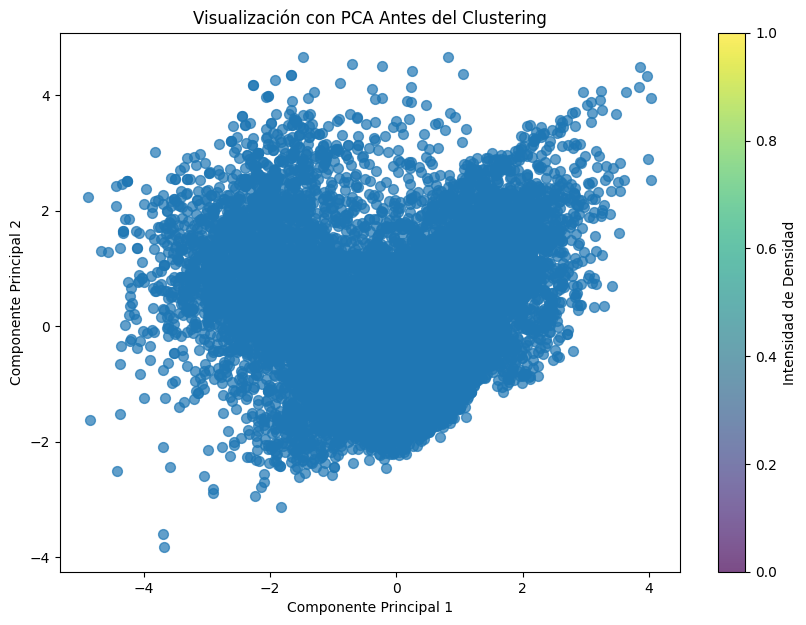

In [29]:
# Reduce to 2 dimensions with PCA before clustering
pca_before = PCA(n_components=2)
X_pca_before = pca_before.fit_transform(X_top_sample)  # Scaled data

# Plot the original data
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], cmap='viridis', alpha=0.7, s=50)
plt.title("Visualization with PCA Before Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Density Intensity")
plt.show()

### PCA After

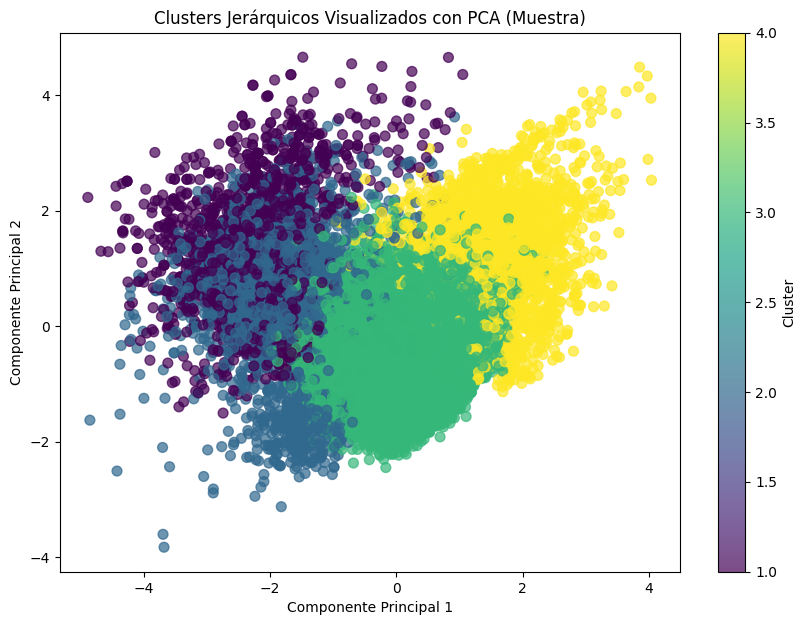

In [25]:
# Reduce to 2 dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_top_sample)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_top_sample['hierarchical_cluster'], cmap='viridis', alpha=0.7, s=50)
plt.title("Hierarchical Clusters Visualized with PCA (Sample)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

## Interpretation

### Summary of Features

In [49]:
# Calculate average features by cluster
cluster_summary = X_top_sample.groupby('hierarchical_cluster').mean()
print("Summary of average features by cluster:")
cluster_summary

NameError: name 'X_top_sample' is not defined

### Heatmap

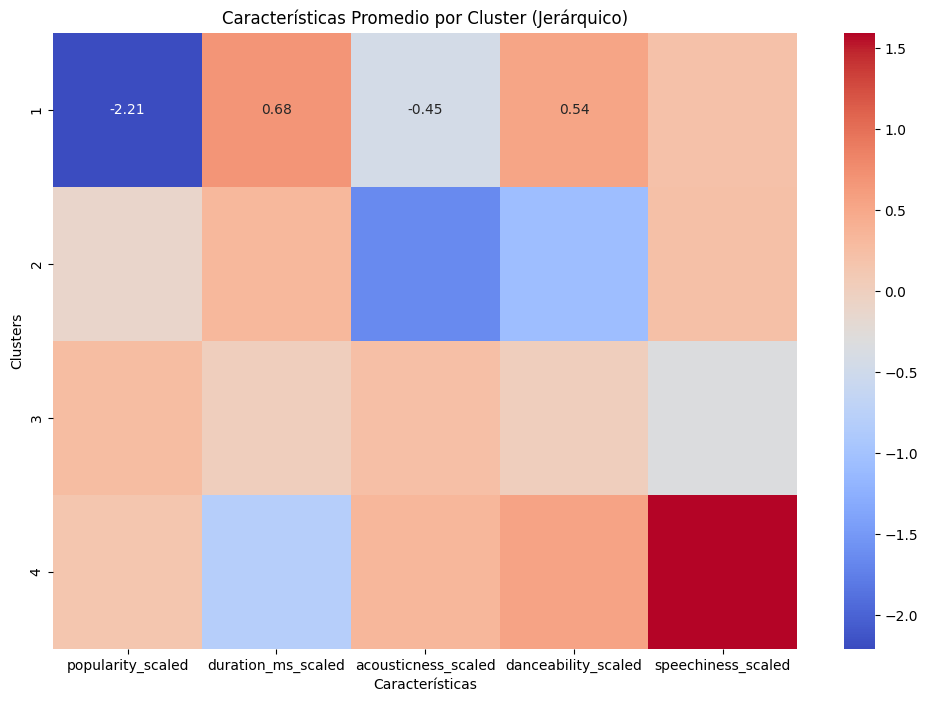

In [27]:
# Visualize with a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Average Features by Cluster (Hierarchical)")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

## Result

**Análisis del Clustering Jerárquico**

El modelo **Clustering Jerárquico** generó 4 clusters, los cuales fueron analizados con base en las características promedio escaladas.

---

**Resumen de las Características Promedio por Cluster**

| Cluster | Popularidad (`popularity_scaled`) | Duración (`duration_ms_scaled`) | Acústica (`acousticness_scaled`) | Bailabilidad (`danceability_scaled`) | Contenido Hablado (`speechiness_scaled`) |
|---------|-----------------------------------|----------------------------------|----------------------------------|--------------------------------------|------------------------------------------|
| **1**   | -2.207                           |  0.675                          | -0.454                          |  0.540                               |  0.209                                  |
| **2**   | -0.115                           |  0.320                          | -1.648                          | -1.065                               |  0.217                                  |
| **3**   |  0.268                           |  0.012                          |  0.236                          |  0.014                               | -0.330                                  |
| **4**   |  0.140                           | -0.796                          |  0.336                          |  0.551                               |  1.594                                  |

---

**Interpretación por Cluster**

**Cluster 1**
- **Popularidad:** Muy baja (-2.207), lo que indica canciones impopulares.
- **Duración:** Canciones largas (0.675), por encima del promedio.
- **Acústica:** Ligeramente baja (-0.454), con menor inclinación hacia la acústica.
- **Bailabilidad:** Moderadamente bailables (0.540).
- **Contenido Hablado:** Levemente positivo (0.209), indicando un contenido hablado balanceado.

---

**Cluster 2**
- **Popularidad:** Cercana al promedio (-0.115).
- **Duración:** Canciones algo largas (0.320).
- **Acústica:** Muy baja (-1.648), indicando menor inclinación acústica.
- **Bailabilidad:** Baja (-1.065), agrupando canciones menos orientadas al baile.
- **Contenido Hablado:** Levemente positivo (0.217), indicando algo de contenido hablado.

---

**Cluster 3**
- **Popularidad:** Positiva (0.268), agrupando canciones más populares.
- **Duración:** Balanceada (0.012), cercana al promedio.
- **Acústica:** Ligeramente acústicas (0.236).
- **Bailabilidad:** Balanceada (0.014), ni alta ni baja.
- **Contenido Hablado:** Ligeramente bajo (-0.330).

---

**Cluster 4**
- **Popularidad:** Ligeramente positiva (0.140), con canciones más populares.
- **Duración:** Canciones cortas (-0.796), significativamente por debajo del promedio.
- **Acústica:** Moderadamente acústicas (0.336).
- **Bailabilidad:** Moderadamente alta (0.551).
- **Contenido Hablado:** Muy alto (1.594), con un fuerte enfoque en contenido hablado.

---

**Conclusión**

El modelo **Clustering Jerárquico** logró dividir las canciones en 4 grupos claros y diferenciados:

1. **Cluster 1:** Canciones largas, impopulares y balanceadas en características.
2. **Cluster 2:** Canciones con baja acústica y bailabilidad.
3. **Cluster 3:** Canciones populares con características balanceadas.
4. **Cluster 4:** Canciones cortas, populares y con alto contenido hablado.

# Resultados finales

# **Comparativa de Métodos de Clustering**

A continuación, se presenta un análisis comparativo de los tres métodos de clustering utilizados: **K-Means**, **DBSCAN** y **Clustering Jerárquico**.

---

## **K-Means**

### Ventajas:
- Genera clusters claramente diferenciados.
- Ideal para datasets con clusters de forma esférica y tamaños similares.
- Identificó 3 clusters con interpretaciones claras basadas en las características.

### Desventajas:
- Supone que todos los clusters tienen formas similares (esféricas).
- Sensible a los valores iniciales de los centroides y al escalado de las características.

### Conclusión:
El modelo **K-Means** proporcionó clusters bien definidos y útiles para el análisis. Fue capaz de separar las canciones en categorías interpretables como:
1. Canciones largas y poco populares.
2. Canciones cortas y bailables con alto contenido hablado.
3. Canciones más populares con características balanceadas.

---

## **DBSCAN**

### Ventajas:
- Detecta clusters de formas arbitrarias y puede manejar ruido.
- Identificó un pequeño porcentaje de puntos como ruido (4.51%).

### Desventajas:
- Produjo un cluster dominante (92% de los datos en el Cluster 0), lo que indica una incapacidad para capturar subestructuras significativas.
- Generó 171 clusters, muchos de ellos extremadamente pequeños y poco prácticos.
- Un **Silhouette Score** negativo (-0.257) sugiere una agrupación inconsistente.

### Conclusión:
**DBSCAN** no cumplió con las expectativas debido a una alta concentración de puntos en un único cluster y a la generación de numerosos clusters pequeños. Es probable que los parámetros (`epsilon` y `min_samples`) no fueran adecuados para este dataset o que las estructuras no se ajustaran a la densidad esperada por el modelo.

---

## **Clustering Jerárquico**

### Ventajas:
- No requiere predefinir el número de clusters.
- Permite una visualización clara de las relaciones jerárquicas entre los datos mediante el dendrograma.
- Generó 4 clusters claros y fácilmente interpretables.

### Desventajas:
- Requiere muchos recursos para datasets grandes.
- Sensible al método de enlace (ward, promedio, completo, etc.).

### Conclusión:
El modelo jerárquico dividió los datos en 4 clusters bien definidos, con características distintivas. Ofreció interpretaciones detalladas y útiles, agrupando canciones en categorías claras como:
1. Canciones largas y poco populares.
2. Canciones con baja acústica y bailabilidad.
3. Canciones populares con características balanceadas.
4. Canciones cortas, populares y con alto contenido hablado.

---

## **Recomendación Final**

1. **K-Means** es la mejor opción para este dataset, ya que proporcionó clusters prácticos, interpretables y equilibrados.
2. **Clustering Jerárquico** es una excelente alternativa si se busca una visualización jerárquica o si no se quiere predefinir el número de clusters.
3. **DBSCAN** no es adecuado para este dataset debido a la concentración excesiva en un único cluster y a la generación de muchos clusters pequeños.

---

## **Visualización Final**

Para cada modelo:
- **K-Means:** Utiliza los clusters para interpretar patrones y comportamientos claros.
- **Clustering Jerárquico:** Aprovecha el dendrograma para identificar relaciones jerárquicas.
- **DBSCAN:** Si decides usarlo, ajusta los parámetros para evitar un cluster dominante. 

**K-Means es el modelo más práctico para este caso.**
